In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/stats_complete.csv")
data.head()

,n,m,dist,random_password,raw_bytes,compressed_bytes,safe_compressed_bytes_simple,safe_compressed_bytes_advanced
0,2,100,even,True,307379,16222,18981,17092
1,2,100,random,True,300970,16459,19072,17282
2,2,100,long_tail,True,265369,15944,18394,16770
3,2,200,even,True,611560,30669,35596,31752
4,2,200,random,True,608671,30423,35454,31742


In [51]:
mdata = data.melt(id_vars=["n", "m", "dist", "random_password"], value_vars=["compressed_bytes", "safe_compressed_bytes_advanced", "safe_compressed_bytes_simple"])
mdata["value_kb"] = mdata.value/1000
mdata.head()

,n,m,dist,random_password,variable,value,value_kb
0,2,100,even,True,compressed_bytes,16222,16.222
1,2,100,random,True,compressed_bytes,16459,16.459
2,2,100,long_tail,True,compressed_bytes,15944,15.944
3,2,200,even,True,compressed_bytes,30669,30.669
4,2,200,random,True,compressed_bytes,30423,30.423


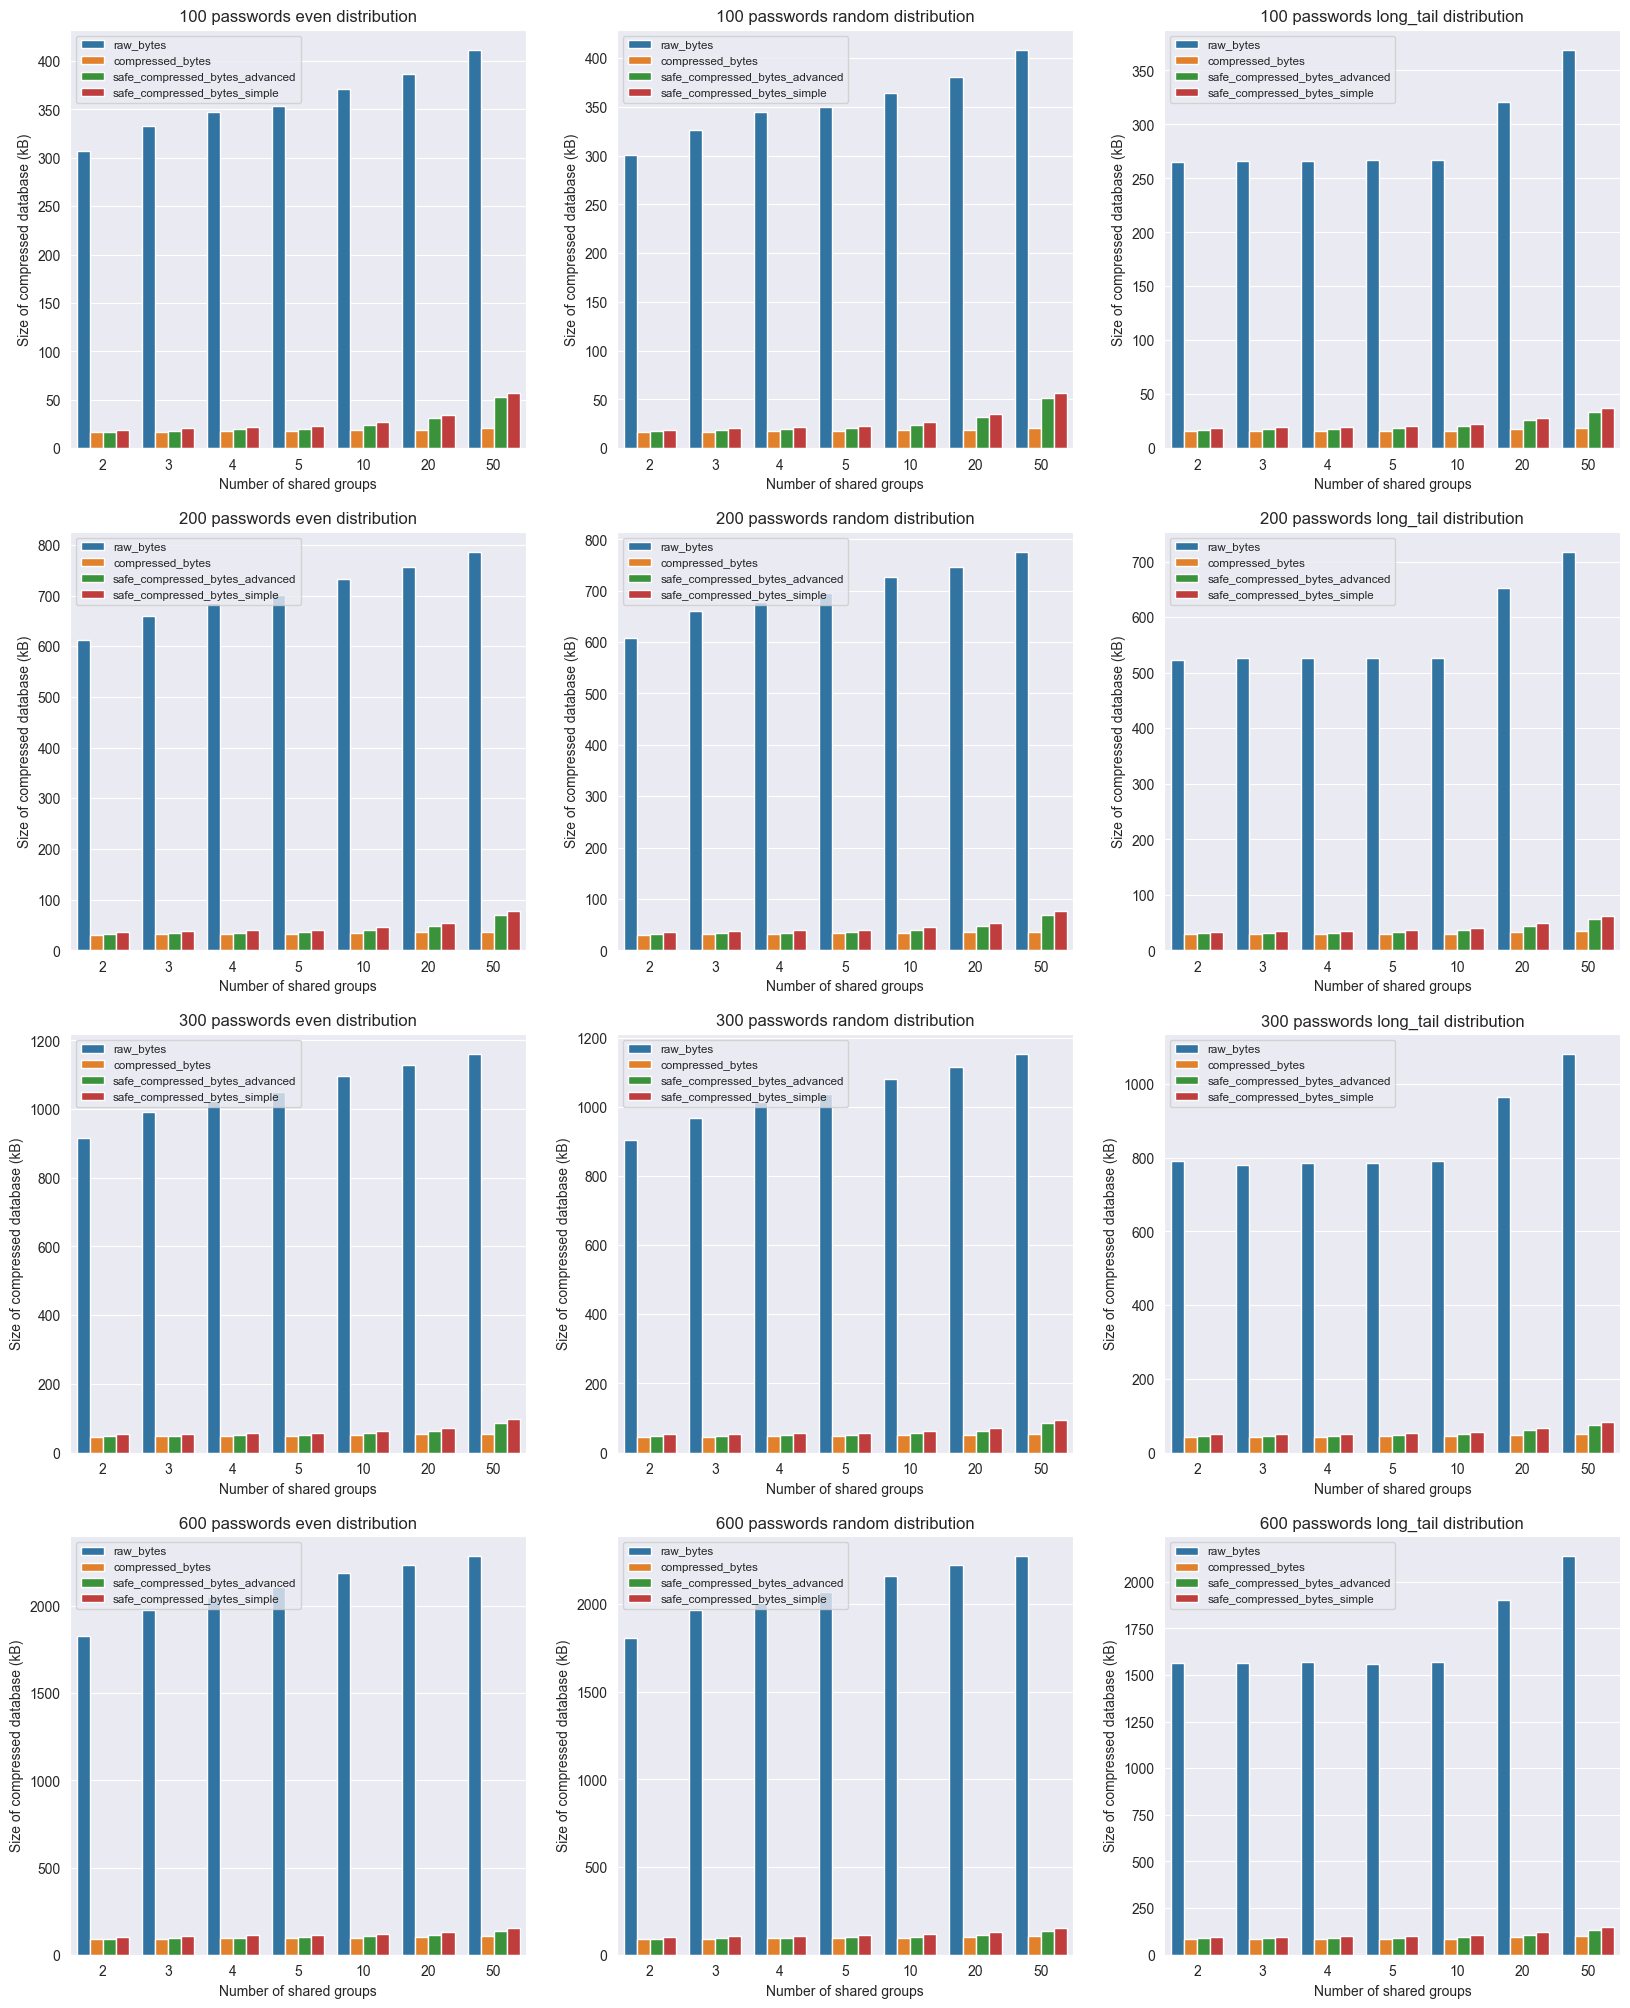

In [48]:
fig, axes = plt.subplots(data.m.nunique(), data.dist.nunique(), figsize=(20, 25))
for i, m in enumerate(data.m.unique()):
    for j, dist in enumerate(data.dist.unique()):
        sns.barplot(mdata[(mdata.m == m) & (mdata.dist == dist)], x="n", y="value_kb", hue="variable", ax=axes[i, j])
        axes[i, j].set_title(f"{m} passwords {dist} distribution")
        axes[i, j].set_xlabel("Number of shared groups")
        axes[i, j].set_ylabel("Size of compressed database (kB)")
        axes[i, j].legend(fontsize="small")
        # axes[i, j].set_ybound(0, 170)
        
plt.savefig("/Users/sjb373/data/secure-compression-framework-lib/sjb_local/stats.png")